# Разведочный анализ данных: начало

Мы будем работать с датасетом про алмазы - в нем содержатся их различные характеристики, а также стоимость.

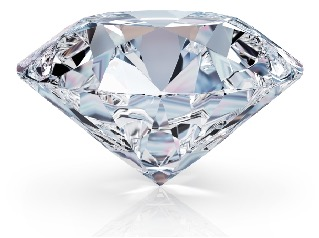

[Интересная статья про качество алмазов](https://www.diamonds.pro/education/diamond-depth-and-table/)

**Цели на сегодня:**

* понять влияние различных характеристик алмазов на их качество и стоимость

* научиться делать разведочный анализ данных

* изучить библиотеки pandas, numpy и matplotlib, seaborn

[Pandas cheatsheet](https://images.datacamp.com/image/upload/v1676302204/Marketing/Blog/Pandas_Cheat_Sheet.pdf)

## Импорт библиотек и загрузка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DIAMONDS_DATASET = "../data/diamonds_good.csv"

In [3]:
df = pd.read_csv(DIAMONDS_DATASET)

## Описание данных

* `carat` - число каратов алмаза
* `cut` - огранка алмаза
* `color` - цвет алмаза
* `clarity` - прозрачность алмаза
* `depth` - глубина алмаза
* `table` - платформа алмаза (грань, которую можно увидеть, если смотреть на камень лицевой стороной вверх)
* `price` - цена алмаза
* `x` - размер алмаза по оси x
* `y` - размер алмаза по оси y
* `z` - размер алмаза по оси z

In [4]:
df.head(10)

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
5,NaN,Very Good,J,VVS2,62.8,57.0,336.0,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336.0,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337.0,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337.0,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338.0,4.00,4.05,2.39


In [5]:
df.tail()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757.0,5.83,5.87,3.64


In [6]:
df.sample(3)

,carat,cut,color,clarity,depth,table,price,'x','y','z'
27395,2.40,Very Good,I,SI2,60.6,58.5,17955.0,8.59,8.67,5.24
37434,0.33,Ideal,E,VVS1,61.7,56.0,984.0,4.46,4.48,2.76
52218,0.81,Premium,G,SI2,61.7,57.0,2482.0,5.99,5.94,3.68


## Исследование данных

Размер датасета

In [7]:
df.shape

(53940, 10)

Информация о типах данных и пропусках

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53442 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    52950 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   'x'      53940 non-null  float64
 8   'y'      53935 non-null  float64
 9   'z'      53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


Основные числовые характеристики

In [9]:
df.describe()

,carat,depth,table,price,'x','y','z'
count,53442.000000,52950.000000,53940.000000,53940.000000,53940.000000,53935.000000,53940.000000
mean,0.797561,61.749422,57.457184,3932.799722,5.731157,5.734469,3.538734
std,0.473534,1.431558,2.234491,3989.439738,1.121761,1.142125,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
df.describe(include='object')

,cut,color,clarity
count,53940,53940,53940
unique,6,7,8
top,Ideal,G,SI1
freq,21524,11292,13065


In [11]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,'x','y','z'
count,53442.000000,53940,53940,53940,52950.000000,53940.000000,53940.000000,53940.000000,53935.000000,53940.000000
unique,NaN,6,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21524,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797561,NaN,NaN,NaN,61.749422,57.457184,3932.799722,5.731157,5.734469,3.538734
std,0.473534,NaN,NaN,NaN,1.431558,2.234491,3989.439738,1.121761,1.142125,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [12]:
df.duplicated().sum()

np.int64(135)

In [13]:
# df[условие фильтрации]

In [14]:
df[df.duplicated()]

,carat,cut,color,clarity,depth,table,price,'x','y','z'
1005,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105.0,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919.0,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093.0,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130.0,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203.0,5.19,5.17,3.17


In [15]:
# df = df.drop_duplicates()

df.drop_duplicates(inplace=True)

df.shape

(53805, 10)

In [16]:
df.reset_index(inplace=True, drop=True)

df.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [17]:
df.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


## Работа с пропущенными значениями

Стратегии заполнения пропусков:

* если пропусков очень мало (~меньше процента) - строки с пропусками можно удалить или заполнить средним/медианой

* если пропусков мало (~5-10%) - их можно заполнить (средним, медианой, уникальным значением, самым популярным значением, спрогнозировать)

* если пропусков много - можно удалить столбец

* можно пытаться предсказывать пропуски моделью

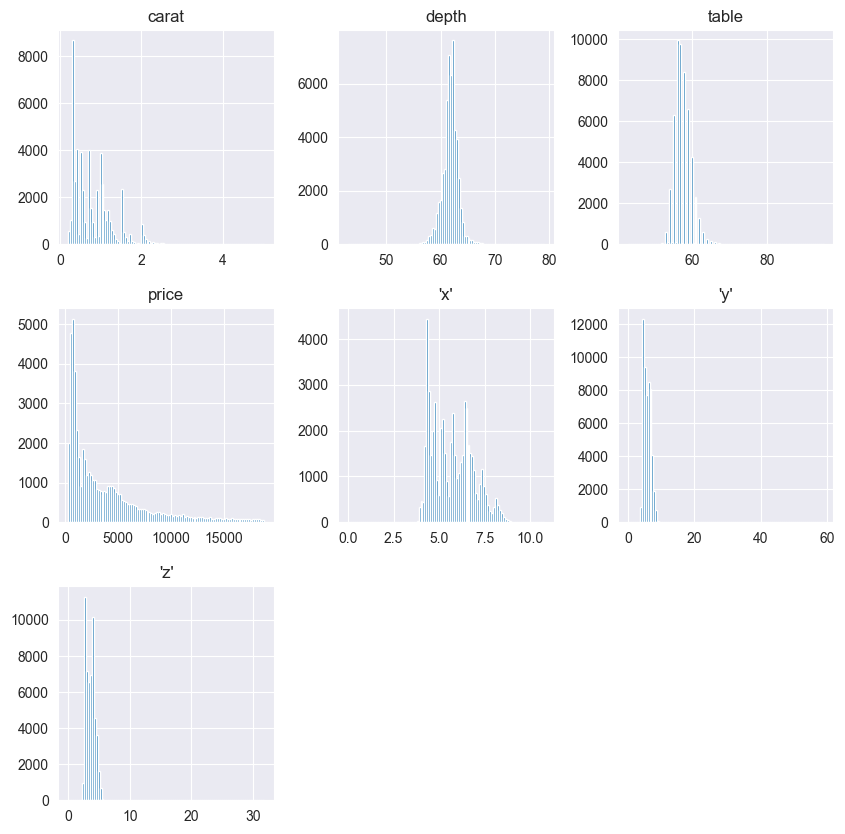

In [18]:
df[["carat","depth","table","price","'x'","'y'","'z'"]].hist(bins=100, figsize=(10,10));

In [19]:
median_carat = df['carat'].median()

df.fillna({'carat': median_carat}, inplace=True)

In [20]:
median_depth = df['depth'].median()

df['depth'].fillna(median_depth, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_5596\819564786.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['depth'].fillna(median_depth, inplace=True)


### Задание 1

Заполните пропуски в столбце `y` медианным значением. Чему равно это значение? Ответ округлите до сотых.

In [21]:
# ваш код здесь

# Создаём переменную для среднего значения медианы
median_y = df["'y'"].median()

print(f"Медианное значение столбца 'y': {round(median_y, 2)}")

# Заполняем данные медианным значением
df.fillna({"'y'": median_y}, inplace=True)

Медианное значение столбца 'y': 5.71


## Однофакторный анализ

### Число карат

* мелкие — массой до 0,30 карат (не включительно);
* средние — массой от 0,30 до 1 карат (не включительно);
* крупные – 1 карат и выше, называют солитеры.


Небольшие бриллианты различного размера, полученные при огранке алмаза, и весящие каждый в отдельности менее 0,25 карат, называют *melee (мили)*. Полученные таким же путем более крупные бриллианты различного размера называют *melange (меланж)*.


Бриллианты более 6 карат обычно продаются c аукционов.


Алмазам и бриллиантам более 25 карат присваивают собственные имена.

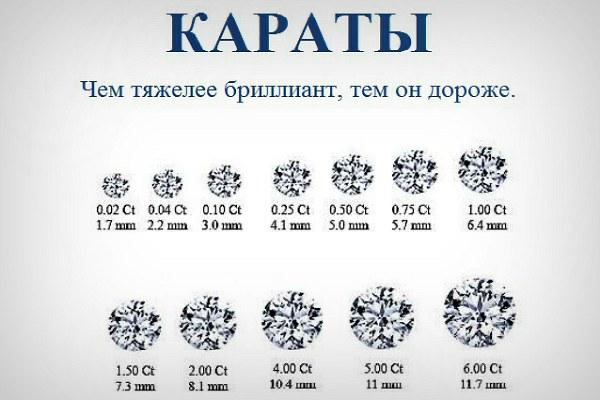

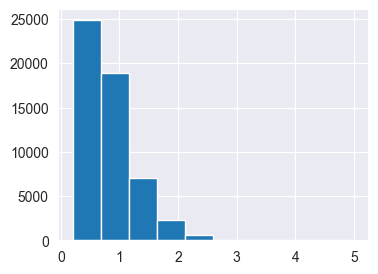

In [22]:
plt.figure(figsize=(4,3))

plt.hist(df.carat);

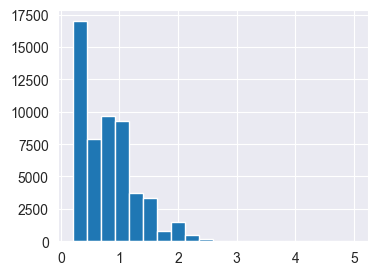

In [23]:
plt.figure(figsize=(4,3))

plt.hist(df.carat, bins=20);

Сколько карат весит самый тяжелый бриллиант в датасете? А самый легкий?

In [24]:
df.carat.min(), df.carat.max()

(np.float64(0.2), np.float64(5.01))

Сколько мелких бриллиантов в датасете?

In [25]:
len(df[df.carat < 0.3])

1582

Сколько процентов бриллиантов среди всего датасета - крупные?

In [26]:
100 * len(df[df.carat >= 1]) / len(df)

35.00046464083264

Посмотрим как число карат влияет на стоимость алмаза

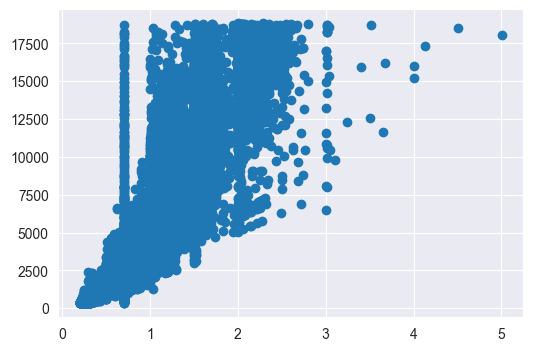

In [27]:
plt.figure(figsize=(6,4))

plt.scatter(df.carat, df.price);

In [28]:
np.corrcoef(df.carat, df.price)[0][1]

np.float64(0.9164989435440222)

### Cut (огранка алмаза)

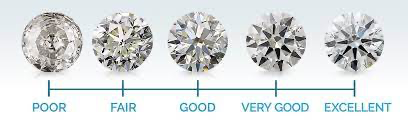

In [29]:
df['cut'].value_counts(normalize=True)

cut
Ideal        0.398941
Premium      0.255088
Very Good    0.224013
Good         0.090772
Fair         0.029700
Goood        0.001487
Name: proportion, dtype: float64

In [30]:
df['cut'] = df['cut'].replace('Goood', 'Good')

Посмотрим как влияет огранка алмаза на его стоимость

C:\Users\User\AppData\Local\Temp\ipykernel_5596\1504348876.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cut', y='price', data = df, palette='summer')


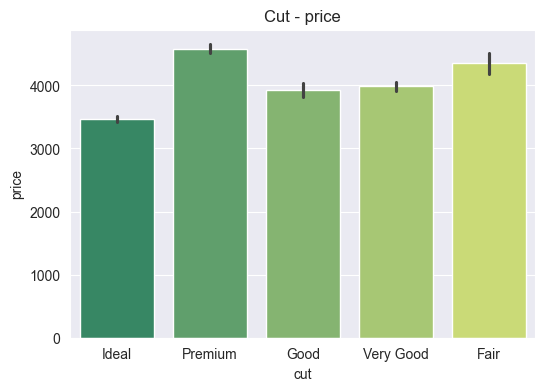

In [31]:
plt.figure(figsize=(6,4))

sns.barplot(x='cut', y='price', data = df, palette='summer')
plt.title('Cut - price')
plt.show();

### Задание 2

Какое максимальное число карат весит алмаз огранки `Fair`?
Ответ округлите до сотых.

In [32]:
# ваш код здесь

max_fair = df[df['cut'] == 'Fair']['carat'].max()

print(round(max_fair, 2))

5.01


Посчитаем среднюю стоимость алмазов в каждой категории

In [33]:
df.groupby('cut')['price'].mean()

cut
Fair         4347.735294
Good         3926.266317
Ideal        3462.593850
Premium      4581.864918
Very Good    3982.162781
Name: price, dtype: float64

Посчитаем несколько характеристик в зависимости от огранки

In [34]:
df.groupby('cut').agg(PriceMean=('price','mean'),
                      PriceMedian=('price', 'median'),
                      CaratMean=('carat', 'mean'))

,PriceMean,PriceMedian,CaratMean
cut,,,
Fair,4347.735294,3282.0,1.040094
Good,3926.266317,3029.5,0.845796
Ideal,3462.593850,1813.0,0.703331
Premium,4581.864918,3175.0,0.889616
Very Good,3982.162781,2649.0,0.804177


In [35]:
df.groupby('cut').agg(PriceMean=('price','mean'),
                      PriceMedian=('price', 'median'),
                      CaratMean=('carat', 'mean')).sort_values(by='PriceMean', ascending=False)

,PriceMean,PriceMedian,CaratMean
cut,,,
Premium,4581.864918,3175.0,0.889616
Fair,4347.735294,3282.0,1.040094
Very Good,3982.162781,2649.0,0.804177
Good,3926.266317,3029.5,0.845796
Ideal,3462.593850,1813.0,0.703331


## Table and Depth

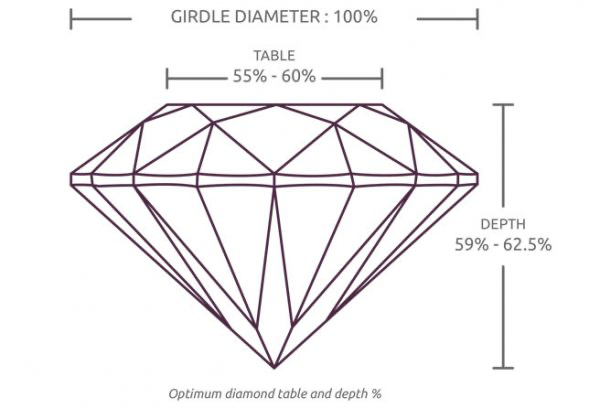

Оптимальное значение параметра `table` для алмаза [55%; 60%].

Какая доля алмазов в данных имеют оптимальное значение `table`?

In [36]:
len(df[(df.table >= 55) & (df.table <= 60)]) / len(df)

0.8439364371340954

### Задание 3

Оптимальное значение параметра `depth` для алмаза [59%; 62.5%].

Какая доля алмазов в данных имеют одновременно оптимальное значение `table` и `depth`?

Ответ округлите до сотых.

In [37]:
# ваш код здесь

optimal = len(df[(df.table >= 55) & (df.table <= 60) & (df.depth >= 59) & (df.depth <= 62.5)]) / len(df)

round(optimal, 2)

0.62

### Задание 4

Сравните медианную стоимость всех алмазов, и алмазов с оптимальными table & depth. Какая больше?

In [38]:
# ваш код здесь

all_price = df['price'].median()
optimal_price = df[(df.table >= 55) & (df.table <= 60) & (df.depth >= 59) & (df.depth <= 62.5)]['price'].median()

print(f'Медианная стоимость всех алмазов: {all_price}')
print(f'Медианная стоимость алмазов с оптимальными table & depth: {optimal_price}')

if all_price > optimal_price:
    print('Медианная стоимость всех алмазов больше')
else:
    print('Медианная стоимости алмазов с оптимальными table & depth больше')

Медианная стоимость всех алмазов: 2401.0
Медианная стоимость алмазов с оптимальными table & depth: 2215.0
Медианная стоимость всех алмазов больше


Вычислите корреляцию `table` и `price`, а затем `depth`и `price`. Какой параметр влияет на цену больше?

In [39]:
np.corrcoef(df.table, df.price)[0][1]

np.float64(0.12662153885758198)

In [40]:
np.corrcoef(df.depth, df.price)[0][1]

np.float64(-0.010831614226837228)

Параметр *table* влияет больше на *price*, чем параметр *depth*

## Clarity - прозрачность алмаза

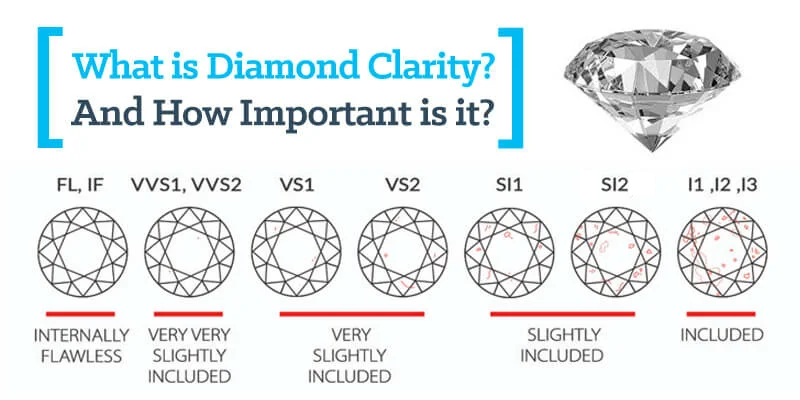

### Задание 5

Сколько различных градаций есть в столбце `clarity`?

In [41]:
# ваш код здесь

df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

Всего *8 градаций*

### Задание 6

Сколько алмазов в таблице, относящихся к категории `very very slightly included`?

In [42]:
# ваш код здесь

len(df[df['clarity'].isin(['VVS1'])])

3648

### Задание 7

Нарисуйте график зависимости цены алмазов от `clarity`. Алмазы какой категории в наших данных стоят дороже остальных?

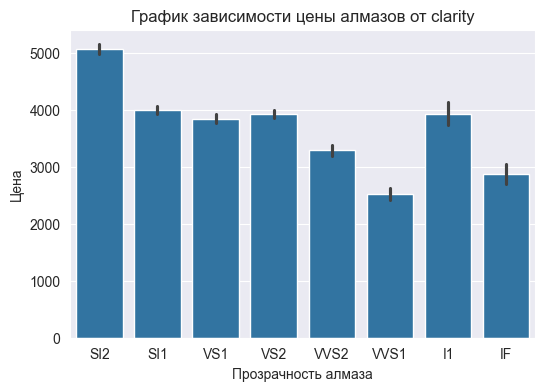

In [43]:
# ваш код здесь
plt.figure(figsize=(6,4))

sns.barplot(x='clarity', y='price', data = df)
plt.title('График зависимости цены алмазов от clarity')
plt.xlabel("Прозрачность алмаза")
plt.ylabel("Цена")
plt.show();

### Задание 8

Для каждой пары значений категорий (`cut`,`clarity`) вычислим среднюю и медианную стоимость. Результат отсортируем по убыванию средней стоимости.

Алмазы какой огранки (`cut`) в совокупностью с некоторой категорией `clarity` имеют наибольшую среднюю стоимость?

In [44]:
# ваш код здесь

df.groupby(by=['cut', 'clarity']).agg({'price': ['median', 'mean']}).sort_values(by=('price', 'mean'), ascending=False)

price             
                   median         mean
cut       clarity                     
Premium   SI2      4292.5  5556.262491
Fair      SI2      3681.0  5145.740175
Very Good SI2      4042.0  4988.709447
Ideal     SI2      4068.0  4761.711917
Good      SI2      3763.0  4544.119816
Premium   VS2      2724.0  4539.441053
          VS1      2362.0  4491.247730
          SI1      3618.0  4451.865244
Very Good IF       1708.0  4373.299625
Ideal     I1       3673.5  4335.726027
Good      VS2      3220.5  4280.315631
Very Good VS2      2727.0  4217.842758
Fair      SI1      3511.0  4201.818182
          VS2      3202.5  4189.217054
          VS1      2829.5  4165.141176
Good      IF       1806.0  4141.931507
Very Good I1       3283.0  4078.226190
Premium   I1       3261.0  3947.331707
Very Good SI1      2810.0  3936.972136
Fair      VVS1     2797.0  3871.352941
Premium   IF       1148.0  3856.143478
Very Good VS1      2326.5  3805.480813
Good      VS1      2427.0  3799.741248
Premium   VVS2     1334.0  3784.643599
Ideal     SI1      2537.0  3755.110434
Fair      I1       2397.0  3703.533333
Good      SI1      2723.0  3688.387015
          I1       3127.0  3601.810526
Ideal     VS1      1815.0  3490.985179
Fair      VVS2     2484.0  3349.768116
Ideal     VS2      1689.0  3290.504851
          VVS2     1334.0  3256.055212
Good      VVS2     1866.5  3118.108108
Very Good VVS2     1032.0  3037.394652
Premium   VVS1     1115.0  2834.611382
Ideal     VVS1     1114.0  2474.090240
Very Good VVS1      941.0  2451.883249
Ideal     IF       1020.0  2279.618257
Good      VVS1      977.0  2272.391534
Fair      IF       1849.0  1912.333333

## Pandas profiling

In [45]:
# !pip install ydata_profiling
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

In [46]:
#from ydata_profiling import ProfileReport

In [47]:
# df_copy = pd.read_csv(DIAMONDS_DATASET)
#
# profile_report = ProfileReport(df_copy, title='Pandas Profiling Report')

In [48]:
# profile_report

In [49]:
# profile_report.to_file('Diamonds_report.html')

# Домашнее задание

## 1) x, y, z

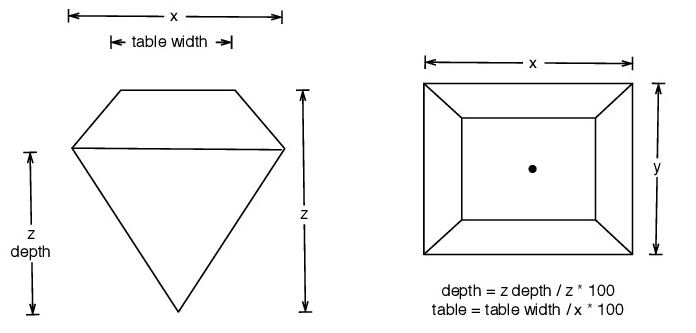

In [50]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', ''x'',
       ''y'', ''z''],
      dtype='object')

Переименуем колонки

In [51]:
df = df.rename(columns={"'x'" : 'x', "'y'" : 'y', "'z'" : 'z'})
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

### Задание 1

Для каждого из трех столбцов (`x`, `y`, `z`) вычислите медианное значение. В ответ запишите максимальное из полученных чисел без округлений.

In [52]:
# ваш код здесь
x_med = (df['x'].median(), 'x')
y_med = (df['y'].median(), 'y')
z_med = (df['z'].median(), 'z')

max_med = max(x_med, y_med, z_med, key=lambda x: x[0])
print(f'Максимальное медианное значение имеет столбец {max_med[1]} равный {max_med[0]}')

Максимальное медианное значение имеет столбец y равный 5.71


Для каждого из этих столбцов вычислите минимальное значение.

In [53]:
df[['x', 'y', 'z']].min()

# np.min(df['x']), np.min(df['y']), np.min(df['z'])

x    0.0
y    0.0
z    0.0
dtype: float64

In [54]:
# Т.к. данные с нулевым значением ошибка находим минимальные ненулевые данные
df[df['x'] > 0]['x'].min(), df[df['y'] > 0]['y'].min(), df[df['z'] > 0]['z'].min()

(np.float64(3.73), np.float64(3.68), np.float64(1.07))

Нулевые размеры - явно ошибки.

### Задание 2

Выведите на экран все строки таблицы (только столбцы `x`,`y`,`z`), в которых хотя бы одна из координат равна нулю.

Сколько таких строк?

In [55]:
# ваш код здесь
df_null_xyz = df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)]
print(f'Кол-во строк с нулевым значением: {len(df_null_xyz)}')
df_null_xyz[['x', 'y', 'z']]

Кол-во строк с нулевым значением: 19


,x,y,z
2201,6.55,6.48,0.0
2308,6.66,6.60,0.0
4779,6.50,6.47,0.0
5458,6.50,6.47,0.0
10146,7.15,7.04,0.0
11158,0.00,6.62,0.0
11937,0.00,0.00,0.0
13572,6.88,6.83,0.0
15916,0.00,0.00,0.0
24342,8.49,8.45,0.0


### Задание 3

Удалите из таблицы эти строки. Сколько строк осталось в таблице?

In [56]:
# ваш код здесь
df.drop(df_null_xyz.index, inplace=True)
print(len(df))

53786


### Задание 4

Вычислите корреляцию между каждым из этих столбцов и `price`. Какой столбец коррелирует с ценой алмаза больше всего?

In [57]:
corr_x = df['price'].corr(df['x'])
corr_y = df['price'].corr(df['y'])
corr_z = df['price'].corr(df['z'])

print(f'Корреляция между ценой и столбцами x, y, z: \n{corr_x}, \n{corr_y}, \n{corr_z}')

corrs = {
    'corr_x': corr_x,
    'corr_y': corr_y,
    'corr_z': corr_z
}

max_name = max(corrs, key=corrs.get)
max_value = corrs[max_name]

print(f'С ценой алмаза больше всего коррелирует столбец {max_name, max_value}')

Корреляция между ценой и столбцами x, y, z: 
0.88718312589951, 
0.867664672031098, 
0.8680889917330574
С ценой алмаза больше всего коррелирует столбец ('corr_x', np.float64(0.88718312589951))


### Задание 5

Постройте scatter-plot для отражения зависимости между ценой алмаза и координатой, наиболее с ней коррелирующей. На какую зависимость она больше всего похожа?

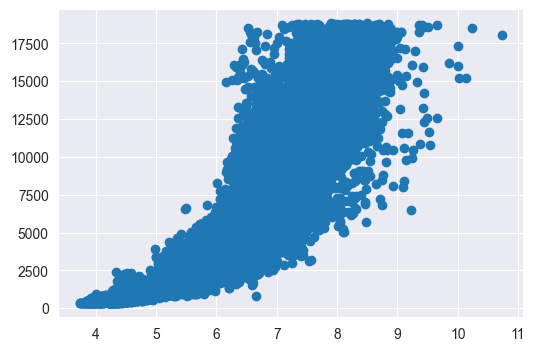

In [58]:
# ваш код здесь

plt.figure(figsize=(6,4))

plt.scatter(df['x'], df['price']);

Больше всего похожа на *полиномиальную* зависимость

### Задание 6

Какой процент среди всех алмазов имеет `x` и `y` размеры, превышающие средние значения (по `x` и `y`)? Ответ округлите до целого числа.

In [59]:
# ваш код здесь
print(f'Среди всех алмазов имеет процент равный {round(len(df[(df['x'] > df['x'].mean()) & (df['y'] > df['y'].mean())]) / len(df) * 100)} %')

Среди всех алмазов имеет процент равный 47 %


### Задание 7

Какая доля среди крупных алмазов имеет `z`-размеры, меньшие медианного? Ответ округлите до четырех знаков после запятой.

In [60]:
# ваш код здесь
print(f'Имеет долю равную',
    round(len(df[(df['carat'] >= 1) & (df['z'] < df['z'].median())]) / len(df), 4))

Имеет долю равную 0.0001


## 2) Color

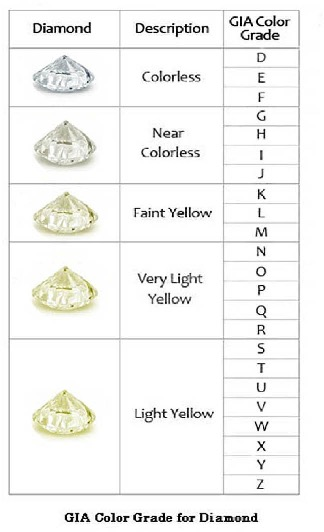

### Задание 8

К каким категориям (Description) из градации выше относятся алмазы в данных?

In [61]:
# ваш код здесь
print(sorted(df['color'].unique()))

['D', 'E', 'F', 'G', 'H', 'I', 'J']


Относятся к Colorless (D, E, F) и Near Colorless (G, H. I, J)

### Задание 9

Нарисуйте график, отражающий зависимость стоимости алмазов от его категории цвета.

Алмазы какого цвета стоят дороже остальных?

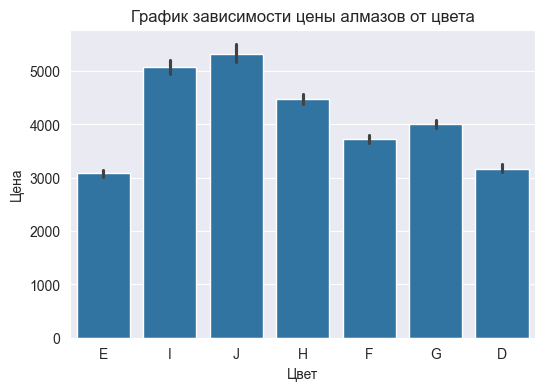

In [62]:
# ваш код здесь
plt.figure(figsize=(6,4))

sns.barplot(x='color', y='price', data = df)
plt.title('График зависимости цены алмазов от цвета')
plt.xlabel("Цвет")
plt.ylabel("Цена")
plt.show();

Дороже всех стоят алмацы J

### Задание 10

Для каждого цвета алмаза вычислите медианную стоимость и медианный вес (в каратах). Отсортируйте полученную при помощи groupby таблицу по убыванию медианной стоимости.

Верно ли, что при убывании PriceMedian, сгруппированной по цвету, CaratMedian также убывает? (не возрастает)

In [63]:
# ваш код здесь

df.groupby(by=['color']).agg({'price': ['median'], 'carat': ['median']}).sort_values(by=('price', 'median'), ascending=False)

,price,carat
,median,median
color,,
J,4234.5,1.11
I,3721.5,1.00
H,3449.5,0.90
F,2345.0,0.70
G,2242.0,0.70
D,1842.0,0.54
E,1741.0,0.54


Да, верно. При убывании PriceMedian, сгруппированной по цвету, CaratMedian также убывает? (не возрастает)

### Задание 11

Вычислите среднюю стоимость алмазов по каждой тройке категорий (`cut`,`color`,`clarity`). Какие алмазы дороже остальных?

В ответе запишите тройку названий в скобках через запятую, без кавычек и пробелов. Например, (Premium,D,IF)

In [64]:
# ваш код здесь
df_group_by = df.groupby(by=['cut', 'color', 'clarity']).agg({'price': ['mean']}).sort_values(by=('price', 'mean'), ascending=False)
print(str(df_group_by.index[0]).replace(' ', '').replace("'", ''))
# df_group.index[0]

(VeryGood,D,IF)


In [65]:
df.to_csv("../data/diamonds_clean.csv", index=False)

----
Второй блок заданий
----

Импорт библиотек

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [67]:
DIAMONDS_DATASET = "../data/diamonds_clean.csv"

In [68]:
df_encoded = pd.read_csv(DIAMONDS_DATASET)
df_encoded

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53781,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53782,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53783,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53784,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74


Проверяем присутствуют ли отсутствующие данные

In [69]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53786 entries, 0 to 53785
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53786 non-null  float64
 1   cut      53786 non-null  object 
 2   color    53786 non-null  object 
 3   clarity  53786 non-null  object 
 4   depth    53786 non-null  float64
 5   table    53786 non-null  float64
 6   price    53786 non-null  float64
 7   x        53786 non-null  float64
 8   y        53786 non-null  float64
 9   z        53786 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


Т.к. с числовыми данными мы поработали выше, осталось преобразовать категориальные данные *Cut, Color, Clarity*

# Обработка категориальных данных

Столбец Cut соответственно можем присвоить числовые значения в зависимости от категории от плохого до идеального, соответственно 0 - 4

In [70]:
# Вывод всех уникальных значений столбца
df_encoded['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [71]:
cut_order = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}

df_encoded['cut_int'] = df_encoded['cut'].map(cut_order)
df_encoded

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_int
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,4
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,3
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,1
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,3
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,1
...,...,...,...,...,...,...,...,...,...,...,...
53781,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50,4
53782,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61,1
53783,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56,2
53784,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74,3


Столбец Clarity мы тоже можем оценить и присвоить в одном столбце числовые значения в зависимости от прозрачности кристалла

In [72]:
# Вывод всех уникальных значений столбца
df_encoded['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [73]:
clarity_order = {'IF': 1, 'VVS2': 2, 'VVS1': 2, 'VS1': 3, 'VS2': 4, 'SI1': 5, 'SI2': 6, 'I1': 7}

df_encoded['clarity_int'] = df_encoded['clarity'].map(clarity_order)
df_encoded

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_int,clarity_int
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,4,6
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,3,5
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,1,3
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,3,4
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
53781,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50,4,5
53782,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61,1,5
53783,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56,2,5
53784,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74,3,6


С колонкой Color мы не можем присвоить числовые категории столбцу, т.к. все цвета между собой равны, потому будет лучше преобразовать столбец в множество столбцов цветов со значениями 0 и 1 с помощью OneHot

In [74]:
# Вывод всех уникальных значений столбца
df_encoded['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [75]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

one_hot_encoded = encoder.fit_transform(df_encoded[['color']])

In [76]:
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['color']))

df_encoded = pd.concat([df_encoded, one_hot_df], axis=1)

In [77]:
df_encoded

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_int,clarity_int,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,4,6,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,3,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,1,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,3,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,1,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53781,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50,4,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0
53782,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61,1,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0
53783,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56,2,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0
53784,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74,3,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0


С категориальными признаками мы закончили, перейдём к представлению карреляции между столбцами, перед этим удалив переведённые столбцы

In [78]:
df_encoded = df_encoded.drop(['cut', 'color', 'clarity'], axis=1)

In [79]:
df_encoded.to_csv("../data/diamonds_encoded.csv", index=False)

----
# Корреляция

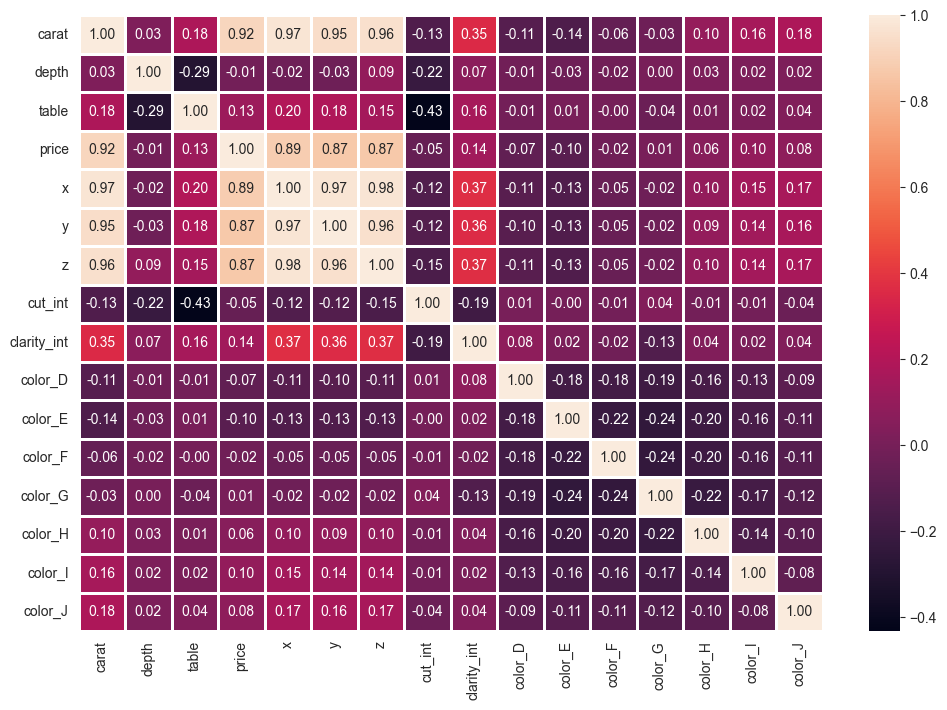

In [80]:
corr = df_encoded.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f', linewidth=1)
plt.show()

In [81]:
corr = df_encoded.drop(['x','y','z'], axis=1).corr()

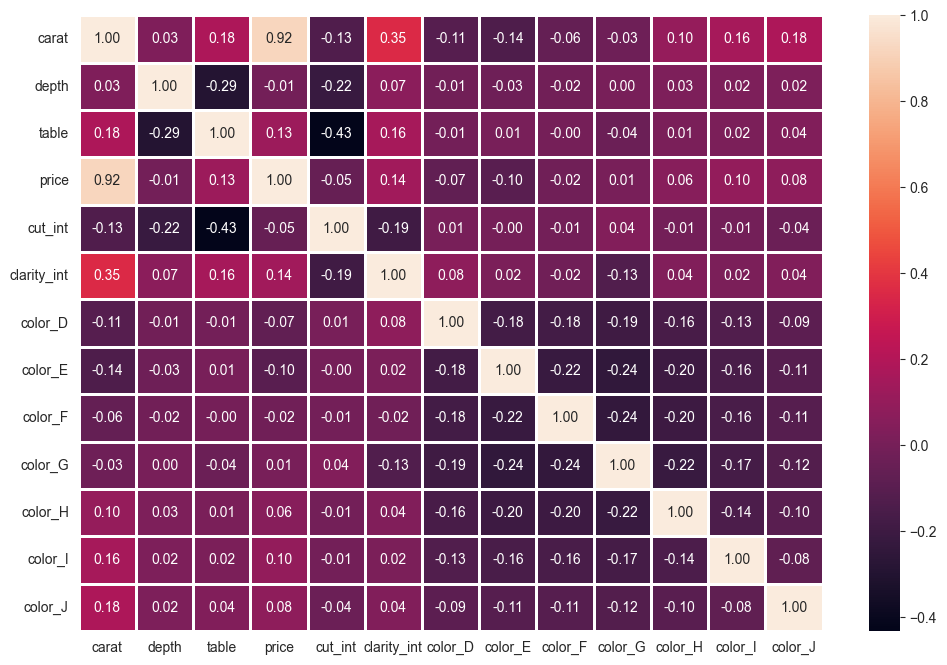

In [82]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f', linewidth=1)
plt.show()

Как распадаются данные по парам фич

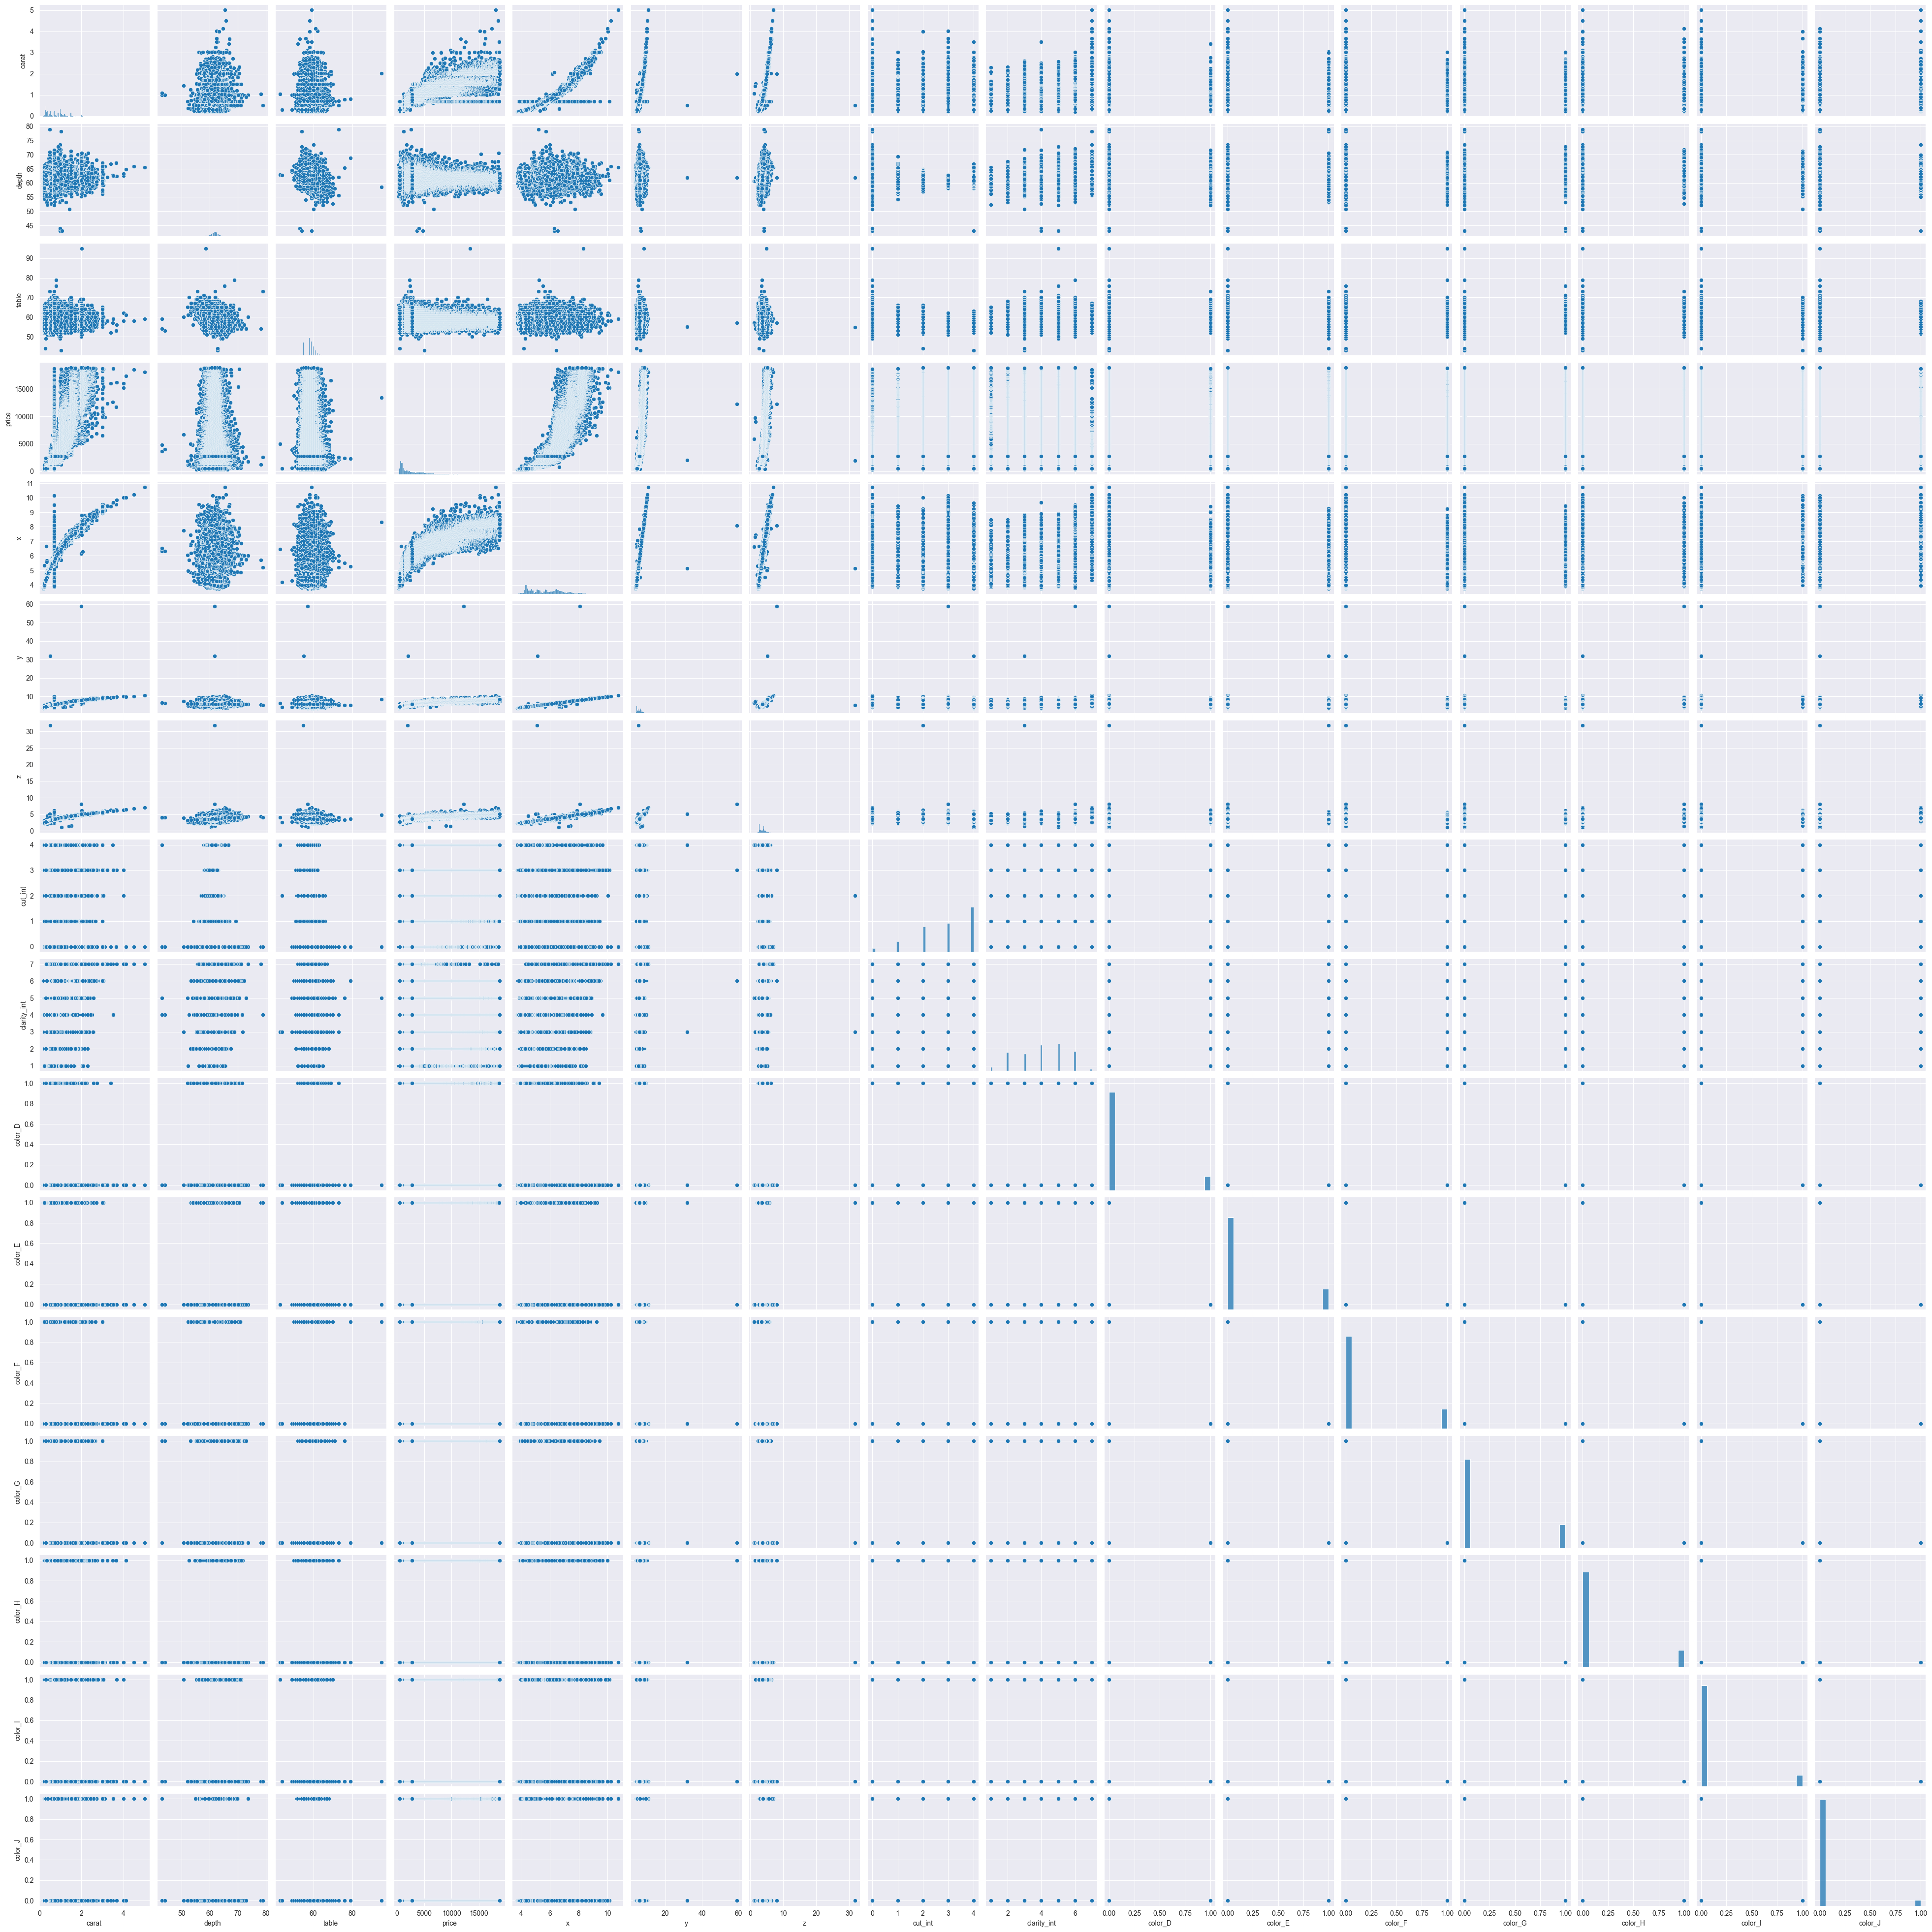

In [83]:
sns.pairplot(df_encoded)

Коррелируют между собой price и depth, price и table.
Зависимость price и carat сильно схожа с price и x

### Оценка важности фич

In [84]:
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

In [85]:
X.head()

,carat,depth,table,x,y,z,cut_int,clarity_int,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,61.5,55.0,3.95,3.98,2.43,4,6,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,3.89,3.84,2.31,3,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,4.05,4.07,2.31,1,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.29,62.4,58.0,4.20,4.23,2.63,3,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.31,63.3,58.0,4.34,4.35,2.75,1,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [86]:
y.head()

0    326.0
1    326.0
2    327.0
3    334.0
4    335.0
Name: price, dtype: float64

### Случайный лес




In [87]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X, y)

feature_importances_series = pd.DataFrame({
    'Feature': X.columns,
    'Importance': random_forest.feature_importances_
}).sort_values(by='Importance', ascending=False)
feature_importances_series

,Feature,Importance
4,y,0.865860
7,clarity_int,0.062516
0,carat,0.015109
14,color_J,0.010924
3,x,0.009908
13,color_I,0.007837
5,z,0.006598
12,color_H,0.005553
1,depth,0.003150
8,color_D,0.002780


### Permutation importance

In [88]:
from sklearn.inspection import permutation_importance

permutation = permutation_importance(random_forest, X, y, n_repeats=10, n_jobs=-1, random_state=42)
pd.DataFrame({
    'Feature': X.columns,
    'Importance': permutation['importances_mean']
}).sort_values(by='Importance', ascending=False)

,Feature,Importance
4,y,1.274210
7,clarity_int,0.167588
0,carat,0.047881
14,color_J,0.040796
13,color_I,0.032543
3,x,0.030072
5,z,0.027747
12,color_H,0.019116
8,color_D,0.013224
11,color_G,0.010114


### Градиентный бустинг

In [89]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boosting.fit(X, y)

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gradient_boosting.feature_importances_
}).sort_values(by='Importance', ascending=False)
feature_importances

,Feature,Importance
4,y,0.800080
5,z,0.097304
7,clarity_int,0.060202
3,x,0.011101
14,color_J,0.009160
0,carat,0.008603
13,color_I,0.005610
8,color_D,0.002046
10,color_F,0.001777
12,color_H,0.001547


### Линейная регрессия

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

linear_model = LinearRegression()
linear_model.fit(X_scaled, y)

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': linear_model.coef_,
    'Abs_Importance': np.abs(linear_model.coef_)
}).sort_values('Abs_Importance', ascending=False)
importance_df

,Feature,Importance,Abs_Importance
0,carat,4191.874103,4191.874103
7,clarity_int,-842.689755,842.689755
14,color_J,-361.034649,361.034649
13,color_I,-226.121564,226.121564
8,color_D,212.713997,212.713997
9,color_E,161.483733,161.483733
6,cut_int,128.272757,128.272757
12,color_H,-123.964074,123.964074
10,color_F,115.603416,115.603416
3,x,-94.278307,94.278307


### Обучение моделей *Линейной регрессии*

In [91]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X[['y', 'clarity_int']], y, test_size=0.2, random_state=42, stratify=pd.qcut(y, q=10))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

print(mean_absolute_percentage_error(y_test, linear_model.predict(scaler.transform(X_test))))

0.6051860571060602


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X[['cut_int', 'carat', 'clarity_int']], y, test_size=0.2, random_state=42, stratify=pd.qcut(y, q=10))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
print(mean_absolute_percentage_error(y_test, linear_model.predict(scaler.transform(X_test))))

0.4486926039348165
